In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('Portuguese.csv')
display(data)
object_list = []
for i in range(len(data.dtypes)):

    if data.dtypes[i] == 'object':
        object_list.append(data.columns[i])
data[object_list] = data[object_list].apply(lambda x: pd.factorize(x)[0])
X = data.drop(['G1', 'G2', 'G3'], axis = 1)
y = data['G3']
y = y.reset_index(drop = True)
y[y[:]<= 10] = 0
y[y[:]>= 10] = 1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery     649 non-null    int64
 20  higher      649 non-null    int6

None

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.303544,0.295840,0.876733,2.514638,2.306626,1.941448,1.488444,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.248317,0.906223,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fully connected neural networks

In [6]:
data_normalization = preprocessing.Normalization()
data_normalization.adapt(X_train)

In [7]:
model_normalize = keras.Sequential()
model_normalize.add(layers.Dense(60,activation='sigmoid',input_dim=30))
model_normalize.add(layers.Dense(120,activation='sigmoid'))
model_normalize.add(layers.Dense(1,activation='sigmoid')
                   )


In [8]:
model_normalize.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam(),metrics=['accuracy'])


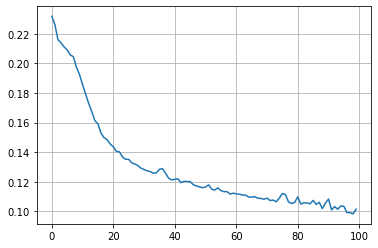

In [9]:
history = model_normalize.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose = 0)
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [10]:
model_normalize.evaluate(X_test, y_test)


7/7 [==============================] - 0s 0s/step - loss: 0.1518 - accuracy: 0.8000


[0.1518007516860962, 0.800000011920929]

### Recurrent neural networks

In [11]:
df = pd.read_csv('spam_normal_emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [12]:
from collections import Counter
Counter( df['spam'])

Counter({1: 1368, 0: 4360})

In [13]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [14]:
df_lower = pd.concat([df['spam'], df['text'].str.lower()], axis=1)
df_lower

,spam,text
0,1,subject: naturally irresistible your corporate...
1,1,subject: the stock trading gunslinger fanny i...
2,1,subject: unbelievable new homes made easy im ...
3,1,subject: 4 color printing special request add...
4,1,"subject: do not have money , get software cds ..."
...,...,...
5723,0,subject: re : research and development charges...
5724,0,"subject: re : receipts from visit jim , than..."
5725,0,subject: re : enron case study update wow ! a...
5726,0,"subject: re : interest david , please , call..."


In [15]:
stop = stopwords.words('english')
stop[:5]

['i', 'me', 'my', 'myself', 'we']

In [16]:
stop.append('subject')

In [17]:
df_lower['text'] = df_lower['text'].str.replace('[{}]'.format(string.punctuation), '')
df_lower

,spam,text
0,1,subject naturally irresistible your corporate ...
1,1,subject the stock trading gunslinger fanny is...
2,1,subject unbelievable new homes made easy im w...
3,1,subject 4 color printing special request addi...
4,1,subject do not have money get software cds fr...
...,...,...
5723,0,subject re research and development charges t...
5724,0,subject re receipts from visit jim thanks ...
5725,0,subject re enron case study update wow all ...
5726,0,subject re interest david please call shi...


In [18]:
df_lower['text'] = df_lower['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df_lower)

      spam                                               text
0        1  naturally irresistible corporate identity lt r...
1        1  stock trading gunslinger fanny merrill muzo co...
2        1  unbelievable new homes made easy im wanting sh...
3        1  4 color printing special request additional in...
4        1  money get software cds software compatibility ...
...    ...                                                ...
5723     0  research development charges gpg forwarded shi...
5724     0  receipts visit jim thanks invitation visit lsu...
5725     0  enron case study update wow day super thank mu...
5726     0  interest david please call shirley crenshaw as...
5727     0  news aurora 5 2 update aurora version 5 2 fast...

[5728 rows x 2 columns]


In [19]:
from sklearn.model_selection import train_test_split

X = df_lower.drop(['spam'], axis = 1)

y =df_lower['spam']


In [20]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=500, split=' ') 
X=X.squeeze()
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = tf.keras.utils.pad_sequences(X)
X

array([[  0,   0,   0, ..., 327,  84, 136],
       [  0,   0,   0, ..., 415,  28, 415],
       [  0,   0,   0, ..., 474, 260,  84],
       ...,
       [  0,   0,   0, ..., 350, 204, 350],
       [  0,   0,   0, ..., 195,   3,   8],
       [  0,   0,   0, ...,  41,  15, 194]])

In [21]:
model = keras.Sequential()
model.add(layers.Embedding(500, 120, input_length = X.shape[1]))
model.add(layers.LSTM(units=64, return_sequences=True))
model.add(layers.LSTM(units=64))
model.add(layers.Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [22]:
y=pd.get_dummies(y)
y


,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5723,1,0
5724,1,0
5725,1,0
5726,1,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [24]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
162/162 [==============================] - 359s 2s/step - loss: 0.1798 - accuracy: 0.9247
Epoch 2/3
162/162 [==============================] - 538s 3s/step - loss: 0.0549 - accuracy: 0.9794
Epoch 3/3
162/162 [==============================] - 575s 4s/step - loss: 0.0567 - accuracy: 0.9790


In [25]:
model.evaluate(X_test,y_test)

18/18 [==============================] - 8s 386ms/step - loss: 0.0720 - accuracy: 0.9773


[0.07202883064746857, 0.9773123860359192]

### Convolutional neural network

In [2]:
from os import listdir
from os.path import isfile, join
import os

Street = 'Train/Street/'
Sea = 'Train/Sea/'




In [3]:
data_street = [Street+f for f in listdir(Street) if isfile(join(Street, f))]
data_sea = [Sea+f for f in listdir(Sea) if isfile(join(Sea, f))]


files = data_street + data_sea 

In [4]:
data_street = [(image, 0) for image in data_street]
data_sea = [(image, 1) for image in data_sea]


In [5]:
data = data_street + data_sea 
data

[('Train/Street/1000.jpg', 0),
 ('Train/Street/10015.jpg', 0),
 ('Train/Street/10019.jpg', 0),
 ('Train/Street/10022.jpg', 0),
 ('Train/Street/10036.jpg', 0),
 ('Train/Street/10039.jpg', 0),
 ('Train/Street/10042.jpg', 0),
 ('Train/Street/1005.jpg', 0),
 ('Train/Street/10062.jpg', 0),
 ('Train/Street/10063.jpg', 0),
 ('Train/Street/10065.jpg', 0),
 ('Train/Street/1007.jpg', 0),
 ('Train/Street/10070.jpg', 0),
 ('Train/Street/10072.jpg', 0),
 ('Train/Street/10076.jpg', 0),
 ('Train/Street/10084.jpg', 0),
 ('Train/Street/10085.jpg', 0),
 ('Train/Street/10091.jpg', 0),
 ('Train/Street/10097.jpg', 0),
 ('Train/Street/10099.jpg', 0),
 ('Train/Street/1011.jpg', 0),
 ('Train/Street/10111.jpg', 0),
 ('Train/Street/10112.jpg', 0),
 ('Train/Street/10118.jpg', 0),
 ('Train/Street/10125.jpg', 0),
 ('Train/Street/10131.jpg', 0),
 ('Train/Street/1015.jpg', 0),
 ('Train/Street/10188.jpg', 0),
 ('Train/Street/10189.jpg', 0),
 ('Train/Street/10195.jpg', 0),
 ('Train/Street/10202.jpg', 0),
 ('Train/Stre

In [6]:
df=pd.DataFrame(data, columns=['path','labels'])
df.head()

,path,labels
0,Train/Street/1000.jpg,0
1,Train/Street/10015.jpg,0
2,Train/Street/10019.jpg,0
3,Train/Street/10022.jpg,0
4,Train/Street/10036.jpg,0


In [7]:
from skimage.transform import  resize
from skimage import io

def image_transform(paths):
    x = []
    for path in paths:
        image = io.imread(path)
        image_res = resize(image,  (150, 150))
        x.append(image_res)
    return x

In [8]:
X = df.drop(['labels'], axis = 1)
y = df['labels']
X

,path
0,Train/Street/1000.jpg
1,Train/Street/10015.jpg
2,Train/Street/10019.jpg
3,Train/Street/10022.jpg
4,Train/Street/10036.jpg
...,...
4651,Train/Sea/9937.jpg
4652,Train/Sea/9965.jpg
4653,Train/Sea/9968.jpg
4654,Train/Sea/9981.jpg


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 42)

In [10]:
X_train.shape

(2328, 1)

In [11]:
y_train.shape

(2328,)

In [12]:
X_train = image_transform(X_train.path.to_list())
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.int32)
X_train.shape

(2328, 150, 150, 3)

In [13]:
from keras.layers import LSTM, Embedding, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(layers.Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam',loss = tf.losses.MeanSquaredError(),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 32)       0

In [14]:
X_train.shape

(2328, 150, 150, 3)

In [15]:
y_train.shape

(2328,)

In [16]:
model.fit(X_train, y_train,epochs=3)

Epoch 1/3
73/73 [==============================] - 47s 585ms/step - loss: 0.5047 - accuracy: 0.4953
Epoch 2/3
73/73 [==============================] - 43s 595ms/step - loss: 0.5047 - accuracy: 0.4953
Epoch 3/3
73/73 [==============================] - 43s 584ms/step - loss: 0.5047 - accuracy: 0.4953


In [23]:
X_test = image_transform(X_test['path'].tolist())
X_test=np.asarray(X_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.int32)

In [26]:
model.evaluate(X_test, y_test)


73/73 [==============================] - 16s 196ms/step - loss: 0.5185 - accuracy: 0.4815


[0.5184707641601562, 0.48152920603752136]